# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Assignment # 2**
**Author :** Tayyab Riaz\
**Roll # :** 22P-9279\
**Section :** BS(AI)\
**Email :** m.tayyab.riaz@outlook.com\
**Reference :** [Kaggle](https://www.kaggle.com/datasets/zusmani/palestine-body-count/)


# **Task 1**

# **`Palestine Body Count`**
Human Cost of Israel-Palestine Conflict (2000 - 2021)

# **About Dataset**

**Context**\
This is an attempt to document the atrocities and human cost in Israel-Palestine conflict.

**Content**\
The dataset contains injuries and fatalities data from both sides from 2000 - 2021. It has year, month, number of people killed and injured from Israel and Palestine. There are 111,475 people injured and 10,000 killed from Palestine and another 5,160 people injured and 1,275 killed from Israel

**Inspiration**\
Use your data science skills to calculate the human cost, statistical value of life and the amount lost in missed work hours, lives lost due to this conflict

**Reference**\
[Kaggle](https://www.kaggle.com/datasets/zusmani/palestine-body-count/)

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import plotly.express as px
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe


# **Task 2**

In [3]:
df=pd.read_csv('Palestine Body Count.csv')


# **Task 3**

In [4]:
df.shape

(251, 6)

In [5]:
df.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000.0,DECEMBER,781,NaN,51,8
1,2000.0,NOVEMBER,3838,NaN,112,22
2,2000.0,OCTOBER,5984,NaN,104,10
3,2000.0,SEPTEMBER,NaN,NaN,16,1
4,2001.0,DECEMBER,304,NaN,67,36


In [6]:
df.tail()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
246,2021.0,MARCH,NaN,NaN,4,0
247,2021.0,APRIL,NaN,NaN,1,0
248,2021.0,MAY,NaN,NaN,26,3
249,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,NaN,"111,475","5,160","10,000","1,275"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    float64
 1   Month                  249 non-null    object 
 2   Palestinians Injuries  196 non-null    object 
 3   Israelis Injuries      133 non-null    object 
 4   Palestinians Killed    250 non-null    object 
 5   Israelis Killed        250 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.9+ KB


In [8]:
df.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed'],
      dtype='object')

In [9]:
df.dtypes

Year                     float64
Month                     object
Palestinians Injuries     object
Israelis Injuries         object
Palestinians Killed       object
Israelis Killed           object
dtype: object

In [10]:
df.isnull().sum()/len(df)*100

Year                      0.796813
Month                     0.796813
Palestinians Injuries    21.912351
Israelis Injuries        47.011952
Palestinians Killed       0.398406
Israelis Killed           0.398406
dtype: float64

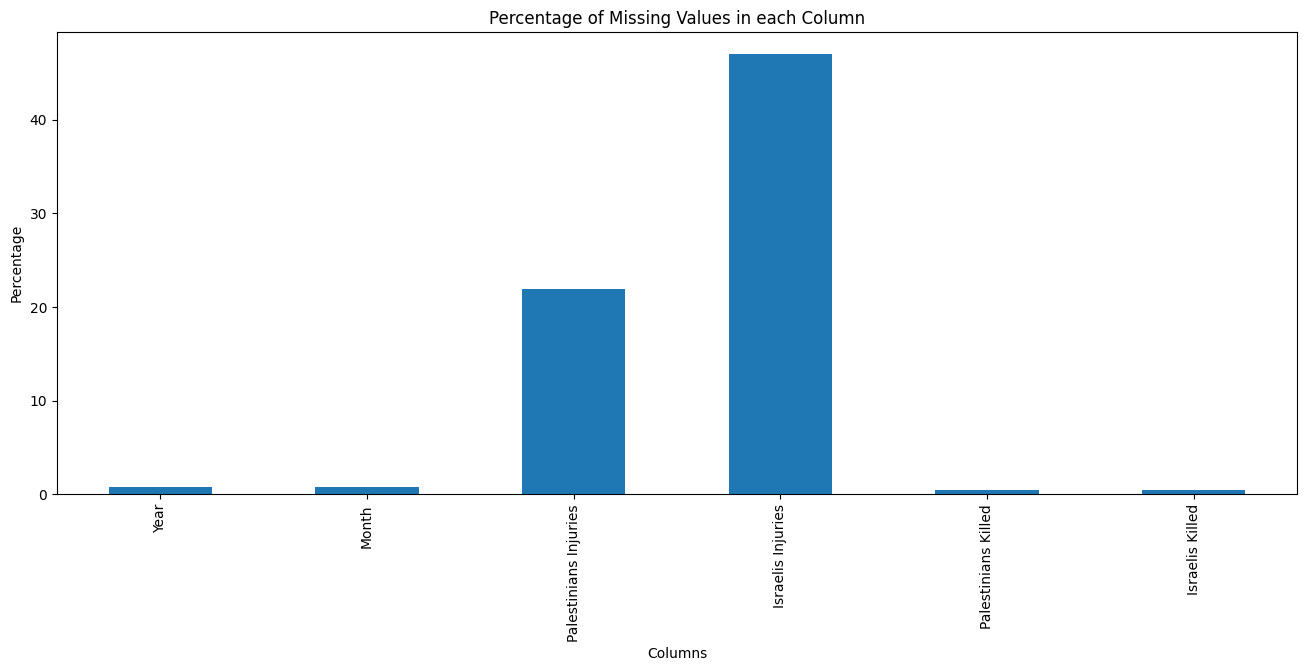

In [11]:
plt.figure(figsize=(16, 6))
missingPercentage = df.isnull().sum()/len(df)*100
missingPercentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')
plt.show()

In [12]:
print('*'*100)
totalValues=df['Year'].value_counts().sum()
print('Total values in Year column are :',totalValues)
totalValues=df['Month'].value_counts().sum()
print('Total values in Month column are :',totalValues)
totalValues=df['Palestinians Injuries'].value_counts().sum()
print('Total values in Palestinians Injuries column are :',totalValues)
totalValues=df['Israelis Injuries'].value_counts().sum()
print('Total values in Israelis Injuries column are :',totalValues)
totalValues=df['Palestinians Killed'].value_counts().sum()
print('Total values in Palestinians Killed column are :',totalValues)
totalValues=df['Israelis Killed'].value_counts().sum()
print('Total values in Israelis Killed column are :',totalValues)
print('*'*100)

****************************************************************************************************
Total values in Year column are : 249
Total values in Month column are : 249
Total values in Palestinians Injuries column are : 196
Total values in Israelis Injuries column are : 133
Total values in Palestinians Killed column are : 250
Total values in Israelis Killed column are : 250
****************************************************************************************************


In [13]:
print('*'*100)
missVal=df['Year'].isnull().sum()
print('Total Missing Values in Year column are:',missVal)
missVal=df['Month'].isnull().sum()
print('Total Missing Values in Month column are:',missVal)
missVal=df['Palestinians Injuries'].isnull().sum()
print('Total Missing Values in Palestinians Injuries column are:',missVal)
missVal=df['Israelis Injuries'].isnull().sum()
print('Total Missing Values in Israelis Injuries column are:',missVal)
missVal=df['Palestinians Killed'].isnull().sum()
print('Total Missing Values in Palestinians Killed column are:',missVal)
missVal=df['Israelis Killed'].isnull().sum()
print('Total Missing Values in Israelis Killed column are:',missVal)
print('*'*100)

****************************************************************************************************
Total Missing Values in Year column are: 2
Total Missing Values in Month column are: 2
Total Missing Values in Palestinians Injuries column are: 55
Total Missing Values in Israelis Injuries column are: 118
Total Missing Values in Palestinians Killed column are: 1
Total Missing Values in Israelis Killed column are: 1
****************************************************************************************************


# **Observation**

We can see Year and month columns have 2 missing value we can not change these two missing values Because we dont know which months and Which years are missing so we simply drop that 2 rows completely from dataset.

In [14]:
missVal=df[df['Year'].isnull()]
missValIndex=list(missVal.index)
print('Missing Values Index in Year column are : ',missValIndex)
missVal=df[df['Month'].isnull()]
missValIndex=list(missVal.index)
print('Missing Values Index in Month column are : ',missValIndex)

Missing Values Index in Year column are :  [249, 250]
Missing Values Index in Month column are :  [249, 250]


In [15]:
df.loc[[249,250]]

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
249,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,NaN,"111,475","5,160","10,000","1,275"


In [16]:
df.drop(index=[249,250],inplace=True)

Now we completely Removed Index 249 and 250 which has Null values in year and Month columns.

In [17]:
print('Total Uniuqe Values in Year column are:',df['Year'].nunique())
print('Uniuqe Values in Year column are:',df['Year'].unique())


Total Uniuqe Values in Year column are: 22
Uniuqe Values in Year column are: [2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021.]


In [18]:
print('Type of Year column is: ',df['Year'].dtype)


Type of Year column is:  float64


In [19]:
df['Year']=df['Year'].apply(lambda x : str(x))
print('After converting it into int type of Year column is: ',df['Year'].dtype)

After converting it into int type of Year column is:  object


In [20]:
df['Month']=df['Month'].apply(lambda x:x.title())
print('Total Uniuqe Values in Month column are:',df['Month'].nunique())
print('Uniuqe Values in Month column are:',df['Month'].unique())

Total Uniuqe Values in Month column are: 14
Uniuqe Values in Month column are: ['December' 'November' 'October' 'September' 'August' 'July' 'June' 'May'
 'April' 'March' 'February' 'January' 'May & June' 'May ']


In [21]:

def clean_month(month):
   month = re.sub(r"\s*\&\s*June", "", month)
   month = re.sub(r"\s*", "", month)
   return month

df['Month'] = df['Month'].apply(clean_month)
months = ['May ', 'May & June']
replacements = ['May', 'May'] 

df['Month'] = df['Month'].replace(months,replacements,regex=True)

In [22]:
print('Total Uniuqe Values in Month column are:',df['Month'].nunique())
print('Uniuqe Values in Month column are:',df['Month'].unique())

Total Uniuqe Values in Month column are: 12
Uniuqe Values in Month column are: ['December' 'November' 'October' 'September' 'August' 'July' 'June' 'May'
 'April' 'March' 'February' 'January']


In [23]:
df['Palestinians Injuries'].dtype
df['Palestinians Injuries'].unique()
df['Palestinians Injuries'].isnull().sum()

54

In [24]:
df['Palestinians Injuries'].str.contains('\(incl\. Jun\)').sum()


1

In [25]:
df['Palestinians Injuries'].str.contains('\(incl\. Aug\)').sum()

1

In [26]:

def removeOutliers(value):
    if isinstance(value, str)and ('(incl. Aug)' in value or '(incl. Jun)' in value):
        return np.nan
    return value

df['Palestinians Injuries'] = df['Palestinians Injuries'].apply(removeOutliers)
         

In [27]:
df['Palestinians Injuries']

0        781
1       3838
2       5984
3        NaN
4        304
5        160
6        407
7        657
8        502
9        394
10       319
11       932
12       715
13       927
14       598
15       471
16       185
17       264
18       388
19       353
20       186
21       374
22       299
23       181
24       523
25       870
26       429
27       330
28       322
29       106
30       289
31       226
32       191
33        34
34       367
35       239
36       303
37       379
38       244
39       292
40       161
41        98
42       343
43       579
44       287
45       251
46       377
47       545
48       346
49       417
50       437
51       168
52       166
53        99
54        81
55        90
56       130
57       165
58       116
59        81
60       183
61        68
62        42
63       164
64        73
65       491
66       180
67       196
68       266
69       799
70       198
71       257
72       254
73       203
74       194
75        88
76     13720

In [28]:
df['Palestinians Injuries'] = pd.to_numeric(df['Palestinians Injuries'], errors='coerce')

In [29]:
df['Palestinians Injuries'].fillna(df['Palestinians Injuries'].mean(),inplace=True)

In [30]:
df['Palestinians Injuries']=df['Palestinians Injuries'].apply(lambda x : int(x))

In [31]:
df['Palestinians Injuries']

0        781
1       3838
2       5984
3        577
4        304
5        160
6        407
7        657
8        502
9        394
10       319
11       932
12       715
13       927
14       598
15       471
16       185
17       264
18       388
19       353
20       186
21       374
22       299
23       181
24       523
25       870
26       429
27       330
28       322
29       106
30       289
31       226
32       191
33        34
34       367
35       239
36       303
37       379
38       244
39       292
40       161
41        98
42       343
43       579
44       287
45       251
46       377
47       545
48       346
49       417
50       437
51       168
52       166
53        99
54        81
55        90
56       130
57       165
58       116
59        81
60       183
61        68
62        42
63       164
64        73
65       491
66       180
67       196
68       266
69       799
70       198
71       257
72       254
73       203
74       194
75        88
76     13720

In [32]:
df['Israelis Injuries'].dtype

dtype('O')

In [33]:
df['Israelis Injuries'].unique()

array([nan, '88', '17', '46', '25', '16', '105', '20', '19', '62', '61',
       '12', '30', '24', '10', '41', '26', '14', '78', '47', '6', '13',
       '87', '56', '7', '22', '15', '35', '5', '11', '0', '21', '59', '3',
       '9', '36', '253', '1', '4', '33', '55', '32', '2347',
       '(incl. Aug)', '28', '43', '50', '80', '39', '8', '18', '2', '27',
       '23', '(incl. Jun)', '37'], dtype=object)

In [34]:
df['Israelis Injuries'].nunique()

55

In [35]:
df['Israelis Injuries'].isnull().sum()

117

In [36]:
df['Israelis Injuries'].str.contains('\(incl\. Aug\)').sum()

1

In [37]:
df['Israelis Injuries'].str.contains('\(incl\. Jun\)').sum()

1

In [38]:
df['Israelis Injuries']=df['Israelis Injuries'].apply(removeOutliers)

In [39]:
df['Israelis Injuries']=pd.to_numeric(df['Israelis Injuries'],errors='coerce')

In [40]:
df['Israelis Injuries'].fillna(df['Israelis Injuries'].median(),inplace=True)

In [41]:
df['Israelis Injuries']=df['Israelis Injuries'].apply(lambda x : int(x))

In [42]:
df['Israelis Injuries']

0        15
1        15
2        15
3        15
4        15
5        15
6        15
7        15
8        15
9        15
10       15
11       15
12       15
13       15
14       15
15       15
16       15
17       15
18       15
19       15
20       15
21       15
22       15
23       15
24       15
25       15
26       15
27       15
28       15
29       15
30       15
31       15
32       15
33       15
34       15
35       15
36       15
37       15
38       15
39       15
40       15
41       15
42       15
43       15
44       15
45       15
46       15
47       15
48       15
49       15
50       15
51       15
52       88
53       17
54       46
55       25
56       16
57      105
58       20
59       17
60       19
61       17
62       62
63       61
64       12
65       30
66       19
67       24
68       10
69       41
70       26
71       14
72       78
73       46
74       30
75       47
76       20
77        6
78       13
79       87
80       56
81        7
82       19
83  

In [43]:
df['Palestinians Killed'].dtype

dtype('O')

In [44]:
df['Palestinians Killed'].unique()

array(['51', '112', '104', '16', '67', '39', '89', '59', '37', '32', '13',
       '46', '23', '27', '19', '72', '66', '53', '43', '57', '48', '246',
       '237', '85', '28', '30', '58', '29', '26', '4', '61', '69', '60',
       '42', '145', '0', '113', '55', '79', '54', '20', '15', '22', '17',
       '11', '25', '5', '10', '1', '9', '50', '14', '134', '74', '180',
       '31', '36', '34', '47', '40', '62', '12', '432', '3', '8', '114',
       '6', '2', '978', '24', '181', '614', '1590', '7', '18', '33', '21'],
      dtype=object)

In [45]:
df['Palestinians Killed']=df['Palestinians Killed'].apply(lambda x:int(x))

In [46]:
df['Palestinians Killed'].dtype

dtype('int64')

In [47]:
df['Palestinians Killed'].isnull().sum()

0

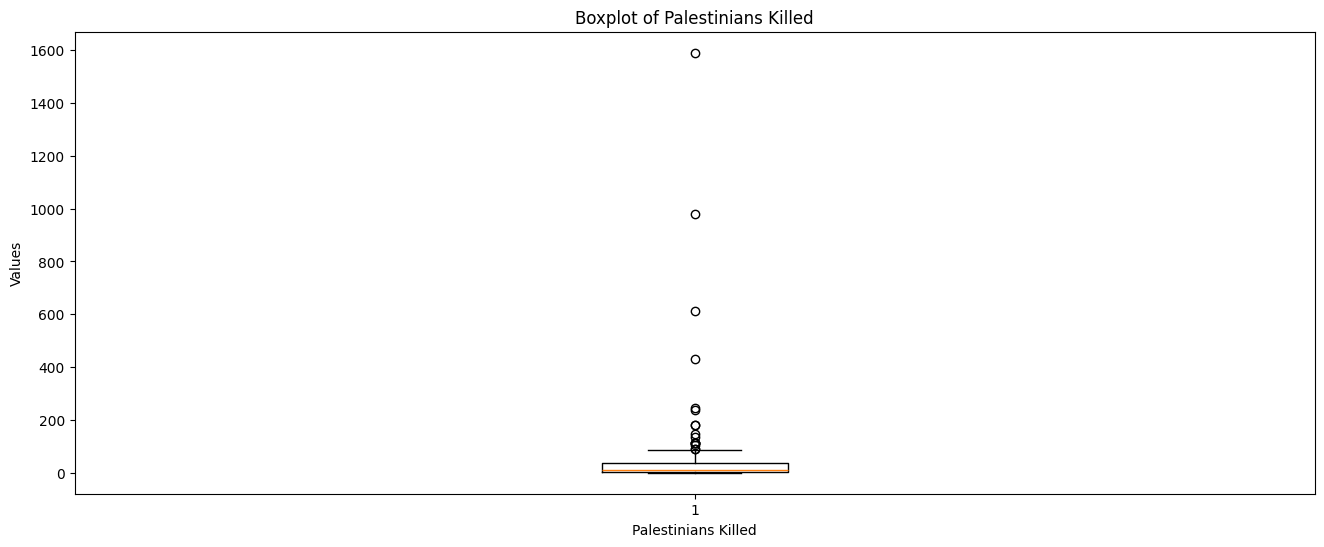

In [48]:
plt.figure(figsize=(16, 6))
plt.boxplot(df['Palestinians Killed'])
plt.title('Boxplot of Palestinians Killed')
plt.xlabel('Palestinians Killed')
plt.ylabel('Values')
plt.show()

As we can see their is an outlier value but We do not remove it because this outlier is authentic and real.

In [49]:
df['Israelis Killed'].dtype

dtype('O')

In [50]:
df['Israelis Killed'].unique()

array(['8', '22', '10', '1', '36', '14', '13', '26', '28', '17', '7', '6',
       '40', '25', '57', '29', '46', '122', '16', '4', '27', '21', '2',
       '23', '3', '11', '0', '19', '15', '5', '12', '9', '59'],
      dtype=object)

In [51]:
df['Israelis Killed']=df['Israelis Killed'].apply(lambda x:int(x))

In [52]:
df['Israelis Killed'].dtype

dtype('int64')

In [53]:
df['Israelis Killed'].isnull().sum()

0

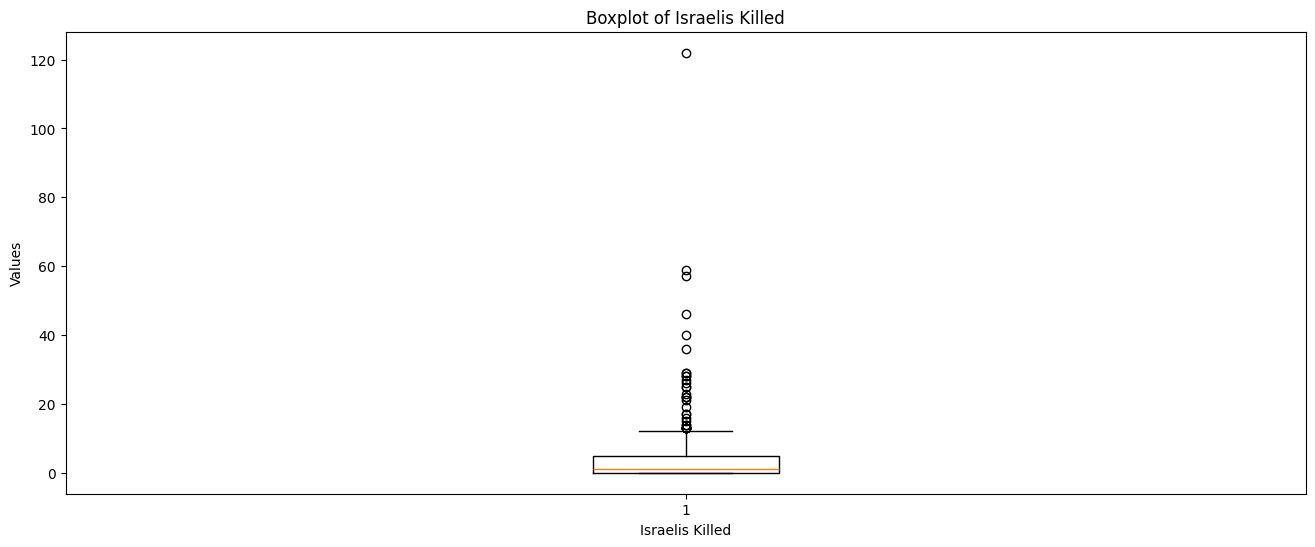

In [54]:
plt.figure(figsize=(16, 6))
plt.boxplot(df['Israelis Killed'])
plt.title('Boxplot of Israelis Killed')
plt.xlabel('Israelis Killed')
plt.ylabel('Values')
plt.show()

In [55]:
df.isnull().sum()/len(df)*100

Year                     0.0
Month                    0.0
Palestinians Injuries    0.0
Israelis Injuries        0.0
Palestinians Killed      0.0
Israelis Killed          0.0
dtype: float64

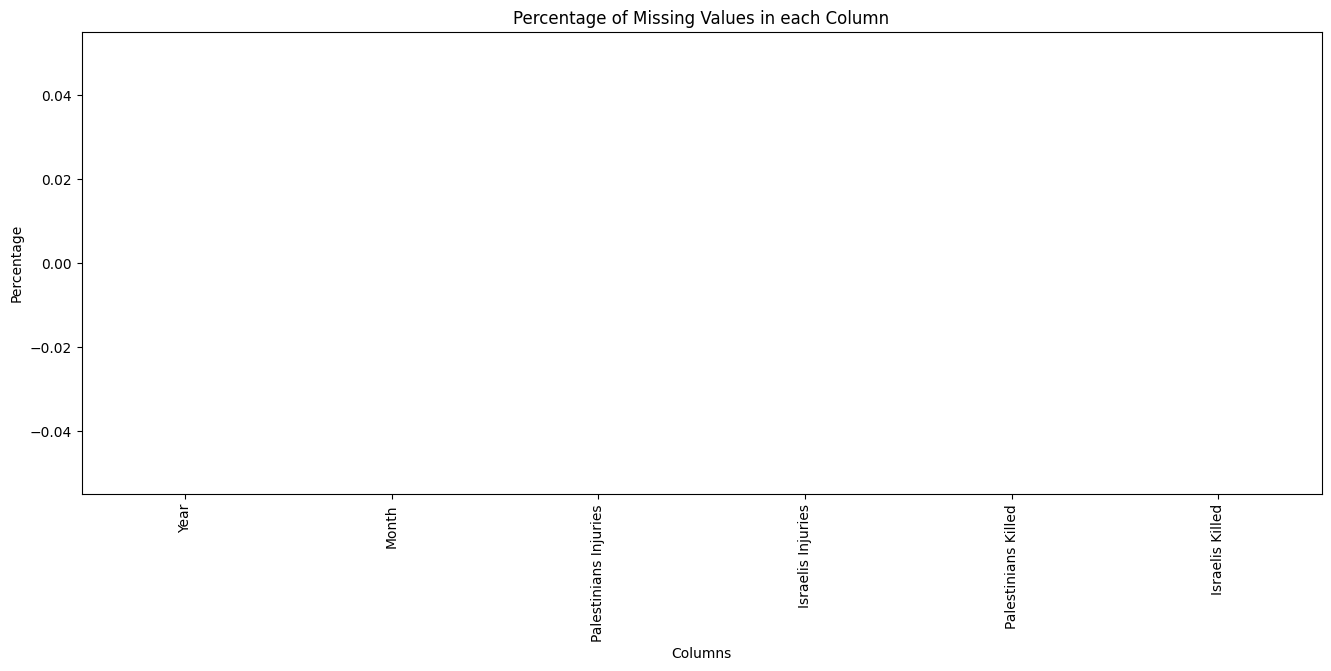

In [56]:
plt.figure(figsize=(16, 6))
missingPercentage = df.isnull().sum()/len(df)*100
missingPercentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')
plt.show()

There is No Null Value in Data.

# **Task 4**

In [57]:
df.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000.0,December,781,15,51,8
1,2000.0,November,3838,15,112,22
2,2000.0,October,5984,15,104,10
3,2000.0,September,577,15,16,1
4,2001.0,December,304,15,67,36


In [58]:
df.tail()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
244,2021.0,January,577,15,4,0
245,2021.0,February,577,15,1,0
246,2021.0,March,577,15,4,0
247,2021.0,April,577,15,1,0
248,2021.0,May,577,15,26,3


In [59]:
df.shape

(249, 6)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   249 non-null    object
 1   Month                  249 non-null    object
 2   Palestinians Injuries  249 non-null    int64 
 3   Israelis Injuries      249 non-null    int64 
 4   Palestinians Killed    249 non-null    int64 
 5   Israelis Killed        249 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 11.8+ KB


In [61]:
df.describe()

,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
count,249.000000,249.000000,249.000000,249.000000
mean,577.457831,27.891566,40.160643,5.120482
std,1446.361703,148.982139,129.148851,11.653323
min,26.000000,0.000000,0.000000,0.000000
25%,152.000000,14.000000,4.000000,0.000000
50%,286.000000,15.000000,12.000000,1.000000
75%,577.000000,15.000000,37.000000,5.000000
max,13735.000000,2347.000000,1590.000000,122.000000


In [62]:
df['Israelis Killed'].max()

122

In [63]:
df['Israelis Killed'].min()

0

In [64]:
df['Palestinians Killed'].max()

1590

In [65]:
df['Palestinians Killed'].min()

0

In [66]:
df['Palestinians Killed'].loc[df['Palestinians Killed']==1590]

165    1590
Name: Palestinians Killed, dtype: int64

In [67]:
# Which months typically see the highest casualties?
df['Israelis Killed'].loc[df['Israelis Killed']==122]


25    122
Name: Israelis Killed, dtype: int64

In [68]:
df.loc[165,['Year','Month']]
df.loc[25,['Year','Month']]



Year     2002.0
Month     March
Name: 25, dtype: object

In [69]:
print('The highest death toll ever in Palistine occurred in July 2014 when 1590 people were killed in attacks.')
print('The highest death toll ever in Israel occurred in March 2002 when 122 people were killed in attacks.')

The highest death toll ever in Palistine occurred in July 2014 when 1590 people were killed in attacks.
The highest death toll ever in Israel occurred in March 2002 when 122 people were killed in attacks.


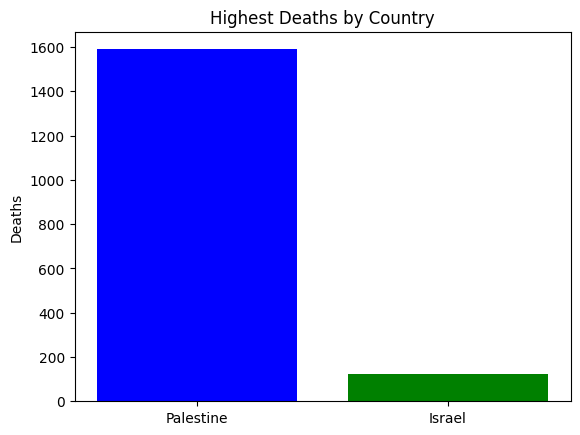

In [70]:
plt.bar(["Palestine", "Israel"], [1590, 122], color=['b','g'])  
plt.ylabel('Deaths')
plt.xticks([0,1], ['Palestine', 'Israel'])
plt.title('Highest Deaths by Country')
plt.show()



In [71]:
fig=px.scatter(df,x='Palestinians Killed',y='Israelis Killed',color='Year')
fig.show()

In [72]:
df['Israelis Injuries'].max()

2347

In [73]:
df['Israelis Injuries'].min()

0

In [74]:
df['Palestinians Injuries'].max()

13735

In [75]:
df['Palestinians Injuries'].min()

26

In [76]:
df['Israelis Injuries'].loc[df['Israelis Injuries']==2347]

164    2347
Name: Israelis Injuries, dtype: int64

In [77]:
df['Palestinians Injuries'].loc[df['Palestinians Injuries']==13735]

164    13735
Name: Palestinians Injuries, dtype: int64

In [78]:
df.loc[164,['Year','Month']]
df.loc[164]


Year                     2014.0
Month                    August
Palestinians Injuries     13735
Israelis Injuries          2347
Palestinians Killed         614
Israelis Killed               9
Name: 164, dtype: object

In [79]:
print('The highest Injuries toll ever in Palistine occurred in Auguest 2014 when 13735 people were Injured in attacks.')
print('The highest Injuries toll ever in Israel occurred in Auguest 2014 when 2375 people were Injured in attacks.')

The highest Injuries toll ever in Palistine occurred in Auguest 2014 when 13735 people were Injured in attacks.
The highest Injuries toll ever in Israel occurred in Auguest 2014 when 2375 people were Injured in attacks.


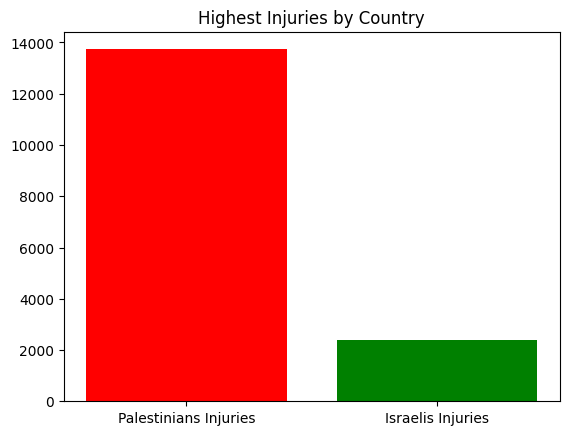

In [80]:
plt.bar(['Palestinians Injuries','Israelis Injuries'],[13735,2375],color=['r','g'])
plt.title('Highest Injuries by Country')
plt.show()

In [81]:
AvgKillsInIsrael=int(df['Israelis Killed'].mean())

In [82]:
AvgKillsInPalestine=int(df['Palestinians Killed'].mean())

In [83]:
print('The avergae kills per month in Palestine was:',AvgKillsInPalestine)
print('The avergae kills per month in Israel was:',AvgKillsInIsrael)


The avergae kills per month in Palestine was: 40
The avergae kills per month in Israel was: 5


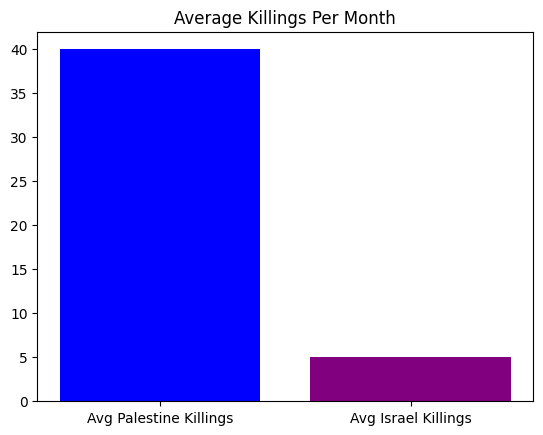

In [84]:
plt.bar(['Avg Palestine Killings','Avg Israel Killings'],[40,5],color=['blue','purple'])
plt.title('Average Killings Per Month')
plt.show()

In [85]:
AvgInjuriesInIsrael=int(df['Israelis Injuries'].mean())

In [86]:
AvgInjuriesInPalestine=int(df['Palestinians Injuries'].mean())

In [87]:
print('The avergae Injuries per month in Palestine was:',AvgInjuriesInPalestine)
print('The avergae Injuries per month in Israel was:',AvgInjuriesInIsrael)


The avergae Injuries per month in Palestine was: 577
The avergae Injuries per month in Israel was: 27


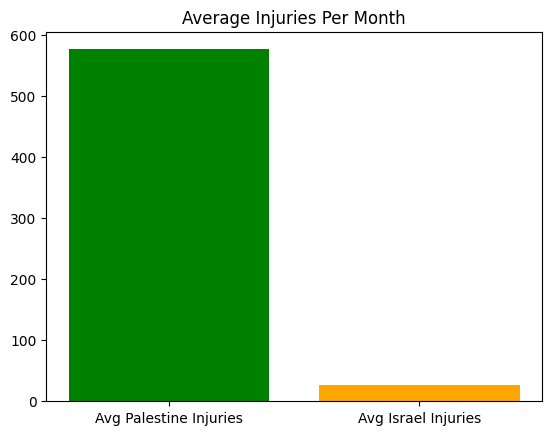

In [88]:
plt.bar(['Avg Palestine Injuries','Avg Israel Injuries'],[577,27],color=['green','orange'])
plt.title('Average Injuries Per Month')
plt.show()

In [89]:
print('Total People killed in Palestine from 2000 to 2021 is :',df['Palestinians Killed'].sum())
print('Total People killed in Isarel from 2000 to 2021 is :',df['Israelis Killed'].sum())
print('Total People Injured in Palestine from 2000 to 2021 is :',df['Palestinians Injuries'].sum())
print('Total People Injured in Isarel from 2000 to 2021 is :',df['Israelis Injuries'].sum())


Total People killed in Palestine from 2000 to 2021 is : 10000
Total People killed in Isarel from 2000 to 2021 is : 1275
Total People Injured in Palestine from 2000 to 2021 is : 143787
Total People Injured in Isarel from 2000 to 2021 is : 6945


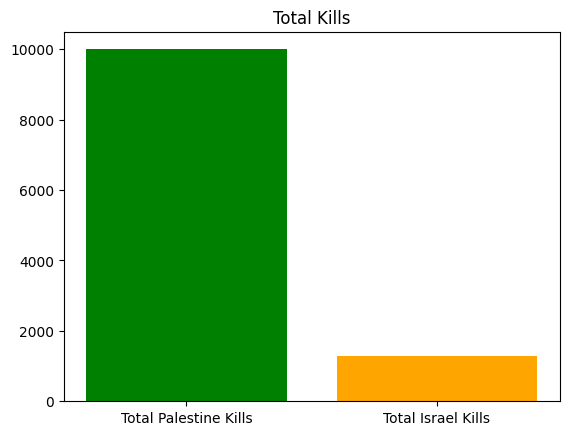

In [90]:
plt.bar(['Total Palestine Kills','Total Israel Kills'],[10000,1275],color=['green','orange'])
plt.title('Total Kills')
plt.show()

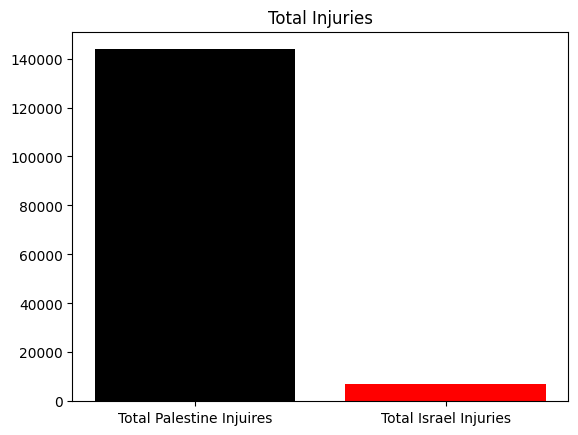

In [91]:
plt.bar(['Total Palestine Injuires','Total Israel Injuries'],[143787,6945],color=['black','red'])
plt.title('Total Injuries')
plt.show()

In [111]:
print('Medain of Israelis Injuries is',df['Israelis Injuries'].median())
print('Mode of Israelis Injuries is',df['Israelis Injuries'].mode()[0])
print('Medain of Israelis Killed is',df['Israelis Killed'].median())
print('Mode of Israelis Killed is',df['Israelis Killed'].mode()[0])
print('Medain of Palestinians Injuries is',df['Palestinians Injuries'].median())
print('Mode of Palestinians Injuries is',df['Palestinians Injuries'].mode()[0])
print('Medain of Palestinians Killed is',df['Palestinians Killed'].median())
print('Mode of Palestinians Killed is',df['Palestinians Killed'].mode()[0])

print('Standard Deviation of Israelis Injuries is',df['Israelis Injuries'].std())
print('Standard Deviation Israelis Killed is',df['Israelis Killed'].std())

print('Standard Deviation of Palestinians Injuries is',df['Palestinians Injuries'].std())
print('Standard Deviation of Palestinians Killed is',df['Palestinians Killed'].std())

Medain of Israelis Injuries is 15.0
Mode of Israelis Injuries is 15
Medain of Israelis Killed is 1.0
Mode of Israelis Killed is 0
Medain of Palestinians Injuries is 286.0
Mode of Palestinians Injuries is 577
Medain of Palestinians Killed is 12.0
Mode of Palestinians Killed is 2
Standard Deviation of Israelis Injuries is 148.98213889873972
Standard Deviation Israelis Killed is 11.653323204232047
Standard Deviation of Palestinians Injuries is 1446.3617032547745
Standard Deviation of Palestinians Killed is 129.14885095428158
